In [ ]:
import pandas as pd  
import warnings
import matplotlib.pyplot as plt 
import numpy as np

: 

In [2]:
df = pd.read_csv("../iris.csv") # les données sur lesquelles portent l'etude
#shape of  dataframe
warnings.filterwarnings("ignore")
print("shape of dataframe: \n" , df.shape)
print ("columns names : \n " , df.columns)

shape of dataframe: 
 (150, 5)
columns names : 
  Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')


In [3]:
x=df.drop('Species', axis=1) # les variables explicatives

y=df[ ['Species']] # la variable à expliquer ou à predire
print("\n tableau X : \n", x)
print("\n tableau Y : \n",y)


 tableau X : 
      Sepal Length  Sepal Width  Petal Length  Petal Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

 tableau Y : 
        Species
0       setosa
1       setosa
2       setosa
3       setosa
4       setosa
..         ...
145  virginica
146  virginica
147  virginica
148  virginica
149  virginica

[150 rows x 1 columns]


In [4]:
from sklearn.model_selection import train_test_split #type: ignore
#On divise les données en echantillon de test x_test , y_test et echantillon d'apprendtissage x_train et y_train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=10)
print("\n Shape of x_train :" ,x_train)
print("\n shape of y_train :",y_train)
print("\n Shape of x_test : ", x_test)
print("\n Shape of y_test :" , y_test)

print("\n x_train: \n" ,x_train.shape)
print( "\n x_tesr: \n", x_test.shape)


 Shape of x_train :      Sepal Length  Sepal Width  Petal Length  Petal Width
68            6.2          2.2           4.5          1.5
109           7.2          3.6           6.1          2.5
81            5.5          2.4           3.7          1.0
78            6.0          2.9           4.5          1.5
51            6.4          3.2           4.5          1.5
..            ...          ...           ...          ...
113           5.7          2.5           5.0          2.0
64            5.6          2.9           3.6          1.3
15            5.7          4.4           1.5          0.4
125           7.2          3.2           6.0          1.8
9             4.9          3.1           1.5          0.1

[100 rows x 4 columns]

 shape of y_train :         Species
68   versicolor
109   virginica
81   versicolor
78   versicolor
51   versicolor
..          ...
113   virginica
64   versicolor
15       setosa
125   virginica
9        setosa

[100 rows x 1 columns]

 Shape of x_test :   

In [5]:
from sklearn.neighbors import KNeighborsClassifier  
# definition du modele knn  avec k = 10
knn_model = KNeighborsClassifier(n_neighbors =10) # on defini le modele pour k =10 
knn_model.fit(x_train, y_train) # entrainer le modele sur les données d'entrainement


KNeighborsClassifier(n_neighbors=10)

In [29]:
print("test du modele avec l'echantillon de test")
print("-----------------------------------")
y_pred_knn = knn_model.predict(x_test)
print("\n Classes reelles  des exemples de test")
print(y_test)
print("\n Classes predites des exemples de test")
print(y_pred_knn)
 

test du modele avec l'echantillon de test
-----------------------------------

 Classes reelles  des exemples de test
        Species
87   versicolor
111   virginica
10       setosa
91   versicolor
49       setosa
60   versicolor
72   versicolor
67   versicolor
39       setosa
55   versicolor
66   versicolor
142   virginica
53   versicolor
1        setosa
19       setosa
112   virginica
85   versicolor
38       setosa
21       setosa
35       setosa
102   virginica
132   virginica
126   virginica
24       setosa
61   versicolor
2        setosa
95   versicolor
90   versicolor
76   versicolor
117   virginica
58   versicolor
97   versicolor
129   virginica
114   virginica
146   virginica
47       setosa
124   virginica
120   virginica
118   virginica
141   virginica
26       setosa
43       setosa
59   versicolor
41       setosa
56   versicolor
32       setosa
52   versicolor
70   versicolor
121   virginica
144   virginica

 Classes predites des exemples de test
['versicolor' 'virginica' 

In [7]:
print("preformance du modele sur l'echantillon de test")
from sklearn.metrics import accuracy_score 
acc = accuracy_score( y_test , y_pred_knn)# calcul de l'exactitude
err = 1-acc # taux d'erreur
print("accuracy " , acc , "erreur de test" , err)

preformance du modele sur l'echantillon de test
accuracy  1.0 erreur de test 0.0


In [8]:
from sklearn.metrics import confusion_matrix
# matrice de  confusion:
conf_knn = confusion_matrix(y_test, y_pred_knn)	
print("matrice de confusion avec les exemples de test")
print(conf_knn)

matrice de confusion avec les exemples de test
[[15  0  0]
 [ 0 19  0]
 [ 0  0 16]]


In [9]:
# matrice de confusion sous forme de dataframe
conf_knn_df = pd.DataFrame( conf_knn , index = ["setosa","versicolor", "virginica"] , columns =["setosa","versicolor", "virginica"])
conf_knn_df

,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,19,0
virginica,0,0,16


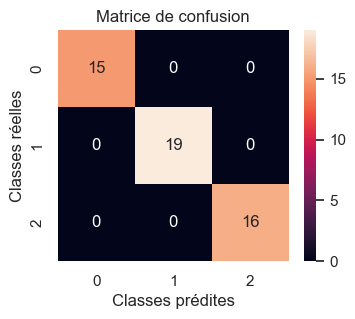

In [33]:
# affichage de la matrice de confusion avec matplolib
import matplotlib.pylab as plt 
import seaborn as sns
# sns.set() ::: set est obsolete
sns.set_theme()
plt.figure(figsize= (4,3))
sns.heatmap(conf_knn , square= True , annot = True , cbar = True)
plt.title( "Matrice de confusion")
plt.ylabel("Classes réelles")
plt.xlabel( "Classes prédites")
plt.show()

In [11]:
from sklearn.metrics import classification_report # type: ignore
clfReport_knn = classification_report(y_test , y_pred_knn)
print("KNN classification report")
print("===============================================")
print(clfReport_knn)

KNN classification report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        19
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [12]:
# marking prediction for a new example
x_new =[[3,5,4,2]]
y_new = knn_model.predict(x_new)
print("prediction :" ,y_new)


prediction : ['versicolor']


In [13]:
# marking predictions for  new examples
x_new = [[3,5,4,2] ,[2,3,5,4],[2.5,1.3,3.5,4.0]]
y_new = knn_model.predict( x_new )
print("Prediction :" , y_new)

Prediction : ['versicolor' 'virginica' 'versicolor']


In [14]:
#Enregistrement du modele dans un fichier binaire
import pickle
pickle.dump(knn_model , open("knn_model.pkl","wb"))
print("le model knn  a été sauvegardé dans le disque dur")


le model knn  a été sauvegardé dans le disque dur


# METHODE NAIVE BAYES

In [15]:
#
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit( x_train , y_train)

GaussianNB()

In [16]:
print("test du modele avec l'echantillon de test")
print("-----------------------------------")
y_pred_NB = NB_model.predict(x_test)
print("\n Classes reelles  des exemples de test")
print(y_test)
print("\n Classes predite par  le model naive bayes")
print(y_pred_NB)

test du modele avec l'echantillon de test
-----------------------------------

 Classes reelles  des exemples de test
        Species
87   versicolor
111   virginica
10       setosa
91   versicolor
49       setosa
60   versicolor
72   versicolor
67   versicolor
39       setosa
55   versicolor
66   versicolor
142   virginica
53   versicolor
1        setosa
19       setosa
112   virginica
85   versicolor
38       setosa
21       setosa
35       setosa
102   virginica
132   virginica
126   virginica
24       setosa
61   versicolor
2        setosa
95   versicolor
90   versicolor
76   versicolor
117   virginica
58   versicolor
97   versicolor
129   virginica
114   virginica
146   virginica
47       setosa
124   virginica
120   virginica
118   virginica
141   virginica
26       setosa
43       setosa
59   versicolor
41       setosa
56   versicolor
32       setosa
52   versicolor
70   versicolor
121   virginica
144   virginica

 Classes predite par  le model naive bayes
['versicolor' 'virgini

In [17]:
print("preformance du modele sur l'echantillon de test")
from sklearn.metrics import accuracy_score # type: ignore
acc = accuracy_score( y_test , y_pred_NB)
err = 1-acc
print("accuracy " , acc*100 ,"%" , "erreur de test" , err*100 ,"%")

preformance du modele sur l'echantillon de test
accuracy  94.0 % erreur de test 6.000000000000005 %


In [18]:
from sklearn.metrics import confusion_matrix
conf_NB = confusion_matrix(y_test, y_pred_NB)	
print("matrice de confusion avec les exemples de test")
print(conf_NB)

matrice de confusion avec les exemples de test
[[15  0  0]
 [ 0 16  3]
 [ 0  0 16]]


In [19]:
# matrice de confusion sous forme de dataframe
conf_NB_df= pd.DataFrame( conf_NB , index = ["setosa","versicolor", "virginica"] , columns =["setosa","versicolor", "virginica"])
conf_NB_df

,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,16,3
virginica,0,0,16


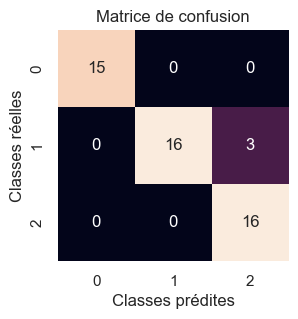

In [20]:
# affichage de la matrice de confusion avec matplolib
import matplotlib.pylab as plt 
import seaborn as sns
# sns.set() ::: set est obsolete
sns.set_theme()
plt.figure(figsize= (4,3))
sns.heatmap(conf_NB , square= True , annot = True , cbar = False)
plt.title( "Matrice de confusion")
plt.ylabel("Classes réelles")
plt.xlabel( "Classes prédites")
plt.show()

In [21]:
from sklearn.metrics import classification_report # type: ignore
clfReport_NB = classification_report(y_test , y_pred_NB)
print("KNN classification report")
print("===============================================")
print(clfReport_NB)

KNN classification report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.84      0.91        19
   virginica       0.84      1.00      0.91        16

    accuracy                           0.94        50
   macro avg       0.95      0.95      0.94        50
weighted avg       0.95      0.94      0.94        50



le model knn est meilleur que le modele naive bayes selon les métrique de performance utilisées , à  savoir l'exactitude( occuracy) , la précision , le rappel et le f1-score